2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: ordered vcf file (based on chr and position)
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_chrom_list = []
    var_pos_allchrom_list = []
    chrom_list=[]
    
    previous_chrom  = ""
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]       # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                       # genomic position of variants
            
            if chrom != previous_chrom:                        # new chromosome started  in the VCF file
                chrom_list.append(chrom)
                if var_pos_chrom_list:           # not empty
                    var_pos_allchrom_list.append(var_pos_chrom_list)                
                var_pos_chrom_list = [var_pos]
            else:                                                  
                var_pos_chrom_list.append(var_pos)                
            
            previous_chrom = chrom
    # adding the last chr
    var_pos_allchrom_list.append(var_pos_chrom_list)                
                
            
    return chrom_list, var_pos_allchrom_list


In [4]:

vcf_file_address= "GRCh38_HG2-T2TQ100-V1.0.vcf"

chrom_list, var_pos_allchrom_list = read_vcf_file(vcf_file_address)

len(var_pos_allchrom_list), len(var_pos_allchrom_list[0]), len(var_pos_allchrom_list[-1]), chrom_list[:3]


(24, 473347, 108269, ['chr1', 'chr2', 'chr3'])

In [5]:
import math

diff_bed={1:[],10:[],100:[],1000:[],10*1000:[],100*1000:[],1000*1000:[], 10*1000*1000:[]}

diff_list_allchrom =[]
for chrom_idx, chrom in enumerate(chrom_list):
    print("***")
    print("working on chr", chrom)
    var_pos_list = var_pos_allchrom_list[chrom_idx]
    diff_list = []
    for i in range(1,len(var_pos_list)):
        if var_pos_list[i]!=var_pos_list[i-1]:
            diff = var_pos_list[i]-var_pos_list[i-1]
            bin_start = 10 ** math.floor(math.log10(diff))
            diff_bed[bin_start].append((chrom, var_pos_list[i-1],diff))

            diff_list.append(diff)
    
    diff_list_allchrom.append(diff_list)
    print("Number of variants in the VCF is ",len(diff_list)+1)
    print("Mean of genomic distance", round(np.mean(diff_list),1),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

print("Max could be due to N positions.")


***
working on chr chr1
Number of variants in the VCF is  447802
Mean of genomic distance 555.7 bp, max distance 18014299 bp, and min distance is 1
***
working on chr chr2
Number of variants in the VCF is  399506
Mean of genomic distance 606.2 bp, max distance 1106543 bp, and min distance is 1
***
working on chr chr3
Number of variants in the VCF is  407767
Mean of genomic distance 486.1 bp, max distance 79495 bp, and min distance is 1
***
working on chr chr4
Number of variants in the VCF is  392265
Mean of genomic distance 484.7 bp, max distance 532209 bp, and min distance is 1
***
working on chr chr5
Number of variants in the VCF is  339237
Mean of genomic distance 534.9 bp, max distance 2514679 bp, and min distance is 1
***
working on chr chr6
Number of variants in the VCF is  337691
Mean of genomic distance 505.3 bp, max distance 400322 bp, and min distance is 1
***
working on chr chr7
Number of variants in the VCF is  336347
Mean of genomic distance 473.7 bp, max distance 306159 b

In [8]:
for bin1,l in diff_bed.items():
    print(bin1,len(l))

1 805821
10 1584620
100 2815340
1000 721756
10000 14427
100000 82
1000000 15
10000000 3


In [9]:
diff_bed[1000000]

[('chr1', 122503030, 2282529),
 ('chr2', 90400091, 1006110),
 ('chr2', 93041797, 1106543),
 ('chr5', 47153312, 2514679),
 ('chr9', 64131472, 1246980),
 ('chr10', 39581758, 1915932),
 ('chr11', 51468570, 1118699),
 ('chr12', 35183809, 1889471),
 ('chr16', 38265300, 8118375),
 ('chr17', 23194840, 3372062),
 ('chr18', 15786384, 4910054),
 ('chr19', 24448743, 2792204),
 ('chr21', 6377219, 1538667),
 ('chr21', 10814524, 2153230),
 ('chr22', 12641590, 2512818)]

In [10]:
# read gap file ucsc 

# 585	chr1	0	10000	1	N	10000	telomere	no
# 586	chr1	207666	257666	5	N	50000	contig	no
# bin	chrom	chromStart	chromEnd	ix	n	size	type	bridge
file_ad="gap_ucsc.txt"

N_dic_list= {}
with open(file_ad) as file:
    for line in file:
        all_=line.split("\t")
        chrm= all_[1]
        strt=int(all_[2])
        end=int(all_[3])
        if all_[5]!= "N":
            print(all_)
        
        if chrm in N_dic_list:
            N_dic_list[chrm].append((strt,end))
        else:
            N_dic_list[chrm]=[(strt,end)]
len(N_dic_list) 

69

In [11]:
diff_bed_excludN={1:[],10:[],100:[],1000:[],10*1000:[],100*1000:[],1000*1000:[], 10*1000*1000:[]}


for bin1,list1 in diff_bed.items():
    print(bin1,len(list1))
    
    for i in range(1,len(list1)):
        
        (chrom, var_pos, diff)= list1[i]
        N_in_between = False
        if chrom in N_dic_list:
            N_list= N_dic_list[chrom]        
            for (N_strt,N_end) in N_list: # var1, strt, end, var2     var1, strt, end, var2
                if var_pos <= N_strt  and N_end <= var_pos+diff:# and   var1 < end :
                    N_in_between=True
                    continue
    
        if not N_in_between:
            diff_bed_excludN[bin1].append((chrom, var_pos, diff))

print("done1")
for bin1,list1 in diff_bed_excludN.items():
    print(bin1,len(list1))    

1 805821
10 1584620
100 2815340
1000 721756
10000 14427
100000 82
1000000 15
10000000 3
done1
1 805820
10 1584619
100 2815328
1000 721740
10000 14345
100000 29
1000000 2
10000000 0


In [30]:
for bin1,list1 in diff_bed_excludN.items():
    print(bin1,len(list1)) 
    if list1:
        file_out= open("dist_start"+str(bin1)+".bed",'w') # "_"+chrm+
        for (chrom, var_pos, diff) in list1:

            file_out.write(chrom+"\t"+str(var_pos-5)+"\t"+str(var_pos+diff+5)+"\n") #v2may6

        file_out.close()
    
    
print("done")

1 805820
10 1584619
100 2815328
1000 721740
10000 14345
100000 29
1000000 2
10000000 0
done


In [ ]:
counts=0
diff_list_allchrom_exclN =[]
for chrom_idx, chrom in enumerate(chrom_list):
    N_list= N_dic_list[chrom]
    
    print("***")
    print("working on chr", chrom)
    var_pos_list = var_pos_allchrom_list[chrom_idx]
    diff_list = []
    for i in range(1,len(var_pos_list)):
        var2= var_pos_list[i]
        var1=var_pos_list[i-1]
        N_in_between = False
        for (N_strt,N_end) in N_list: # var1, strt, end, var2
            
            if var1 < N_strt  and N_end < var2:# and   var1 < end :
                N_in_between=True
                counts+=1
            
            
        if not N_in_between:
            diff = var2-var1
            diff_list.append(diff)
        
    diff_list_allchrom_exclN.append(diff_list)
    print("Number of variants in the VCF is ",len(diff_list)+1)
    print("Mean of genomic distance", round(np.mean(diff_list),1),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

    #print("Max could be due to N positions.")


In [10]:
counts=0
diff_list_allchrom_exclN =[]
for chrom_idx, chrom in enumerate(chrom_list):
    N_list= N_dic_list[chrom]
    
    print("***")
    print("working on chr", chrom)
    var_pos_list = var_pos_allchrom_list[chrom_idx]
    diff_list = []
    for i in range(1,len(var_pos_list)):
        var2= var_pos_list[i]
        var1=var_pos_list[i-1]
        N_in_between = False
        for (N_strt,N_end) in N_list: # var1, strt, end, var2
            
            if var1 < N_strt  and N_end < var2:# and   var1 < end :
                N_in_between=True
                counts+=1
            
            
        if not N_in_between:
            diff = var2-var1
            diff_list.append(diff)
        
    diff_list_allchrom_exclN.append(diff_list)
    print("Number of variants in the VCF is ",len(diff_list)+1)
    print("Mean of genomic distance", round(np.mean(diff_list),1),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

    #print("Max could be due to N positions.")


***
working on chr chr22
Number of variants in the VCF is  135019
Mean of genomic distance 274.3 bp, max distance 22950 bp, and min distance is 1


# archive

In [1]:
# #import pandas as pd
# #pd.DataFrame(diff_list).plot(kind='density') # or pd.Series()
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# x = np.arange(0., 1, .01)

# density_list= []
# for chrom_idx in range(len(diff_list_allchrom_exclN)):
#     print(chrom_idx)
#     diff_list= diff_list_allchrom_exclN[chrom_idx]
#     diff_list_log = [np.log10(i) for i in diff_list]
    
#     density = stats.gaussian_kde(diff_list_log)
#     density_list.append(density(x))

# len(density_list),len(density_list[0])


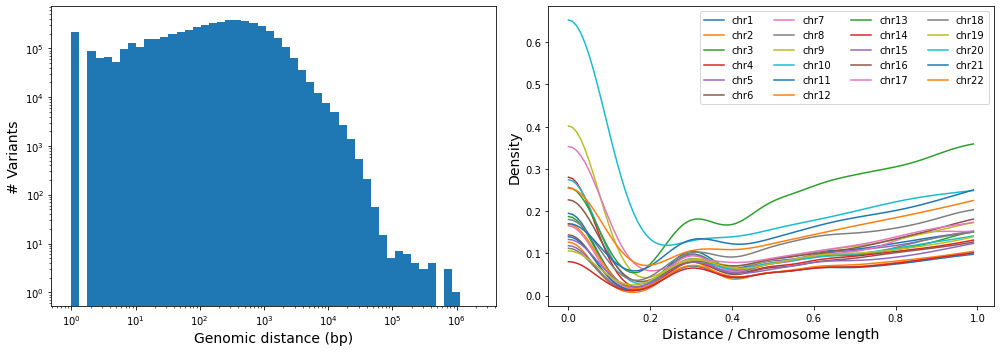

In [17]:

# # we could also use sklearn seaborn 


# fig = plt.figure(figsize=(14,5))

# plt.subplot(1, 2, 1)


# hist, bins = np.histogram(diff_list_allchrom_flat_exclN, bins=50)
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# plt.hist(diff_list_allchrom_flat_exclN, bins=logbins)
# plt.xscale('log')
# plt.yscale('log')
# #plt.title('Histogram for ")
# #plt.title('#Histogram of genomic distance between variants')
# plt.xlabel("Genomic distance (bp)",fontsize=14)
# plt.ylabel("# Variants",fontsize=14)


# plt.subplot(1, 2, 2)
# x = np.arange(0., 1, .01)
# for chrom_idx in range(len(density_list[:22])):
#     density_val = density_list[chrom_idx]
#     plt.plot(x, density_val, label="chr"+str(chrom_idx+1))

# plt.legend(ncol=4)
# plt.xlabel("Distance / Chromosome length",fontsize=14) # Normalized genomic distance
# plt.ylabel("Density",fontsize=14)



# plt.tight_layout() 
# plt.savefig("fig_output/vardis_v4_c_3_.pdf")

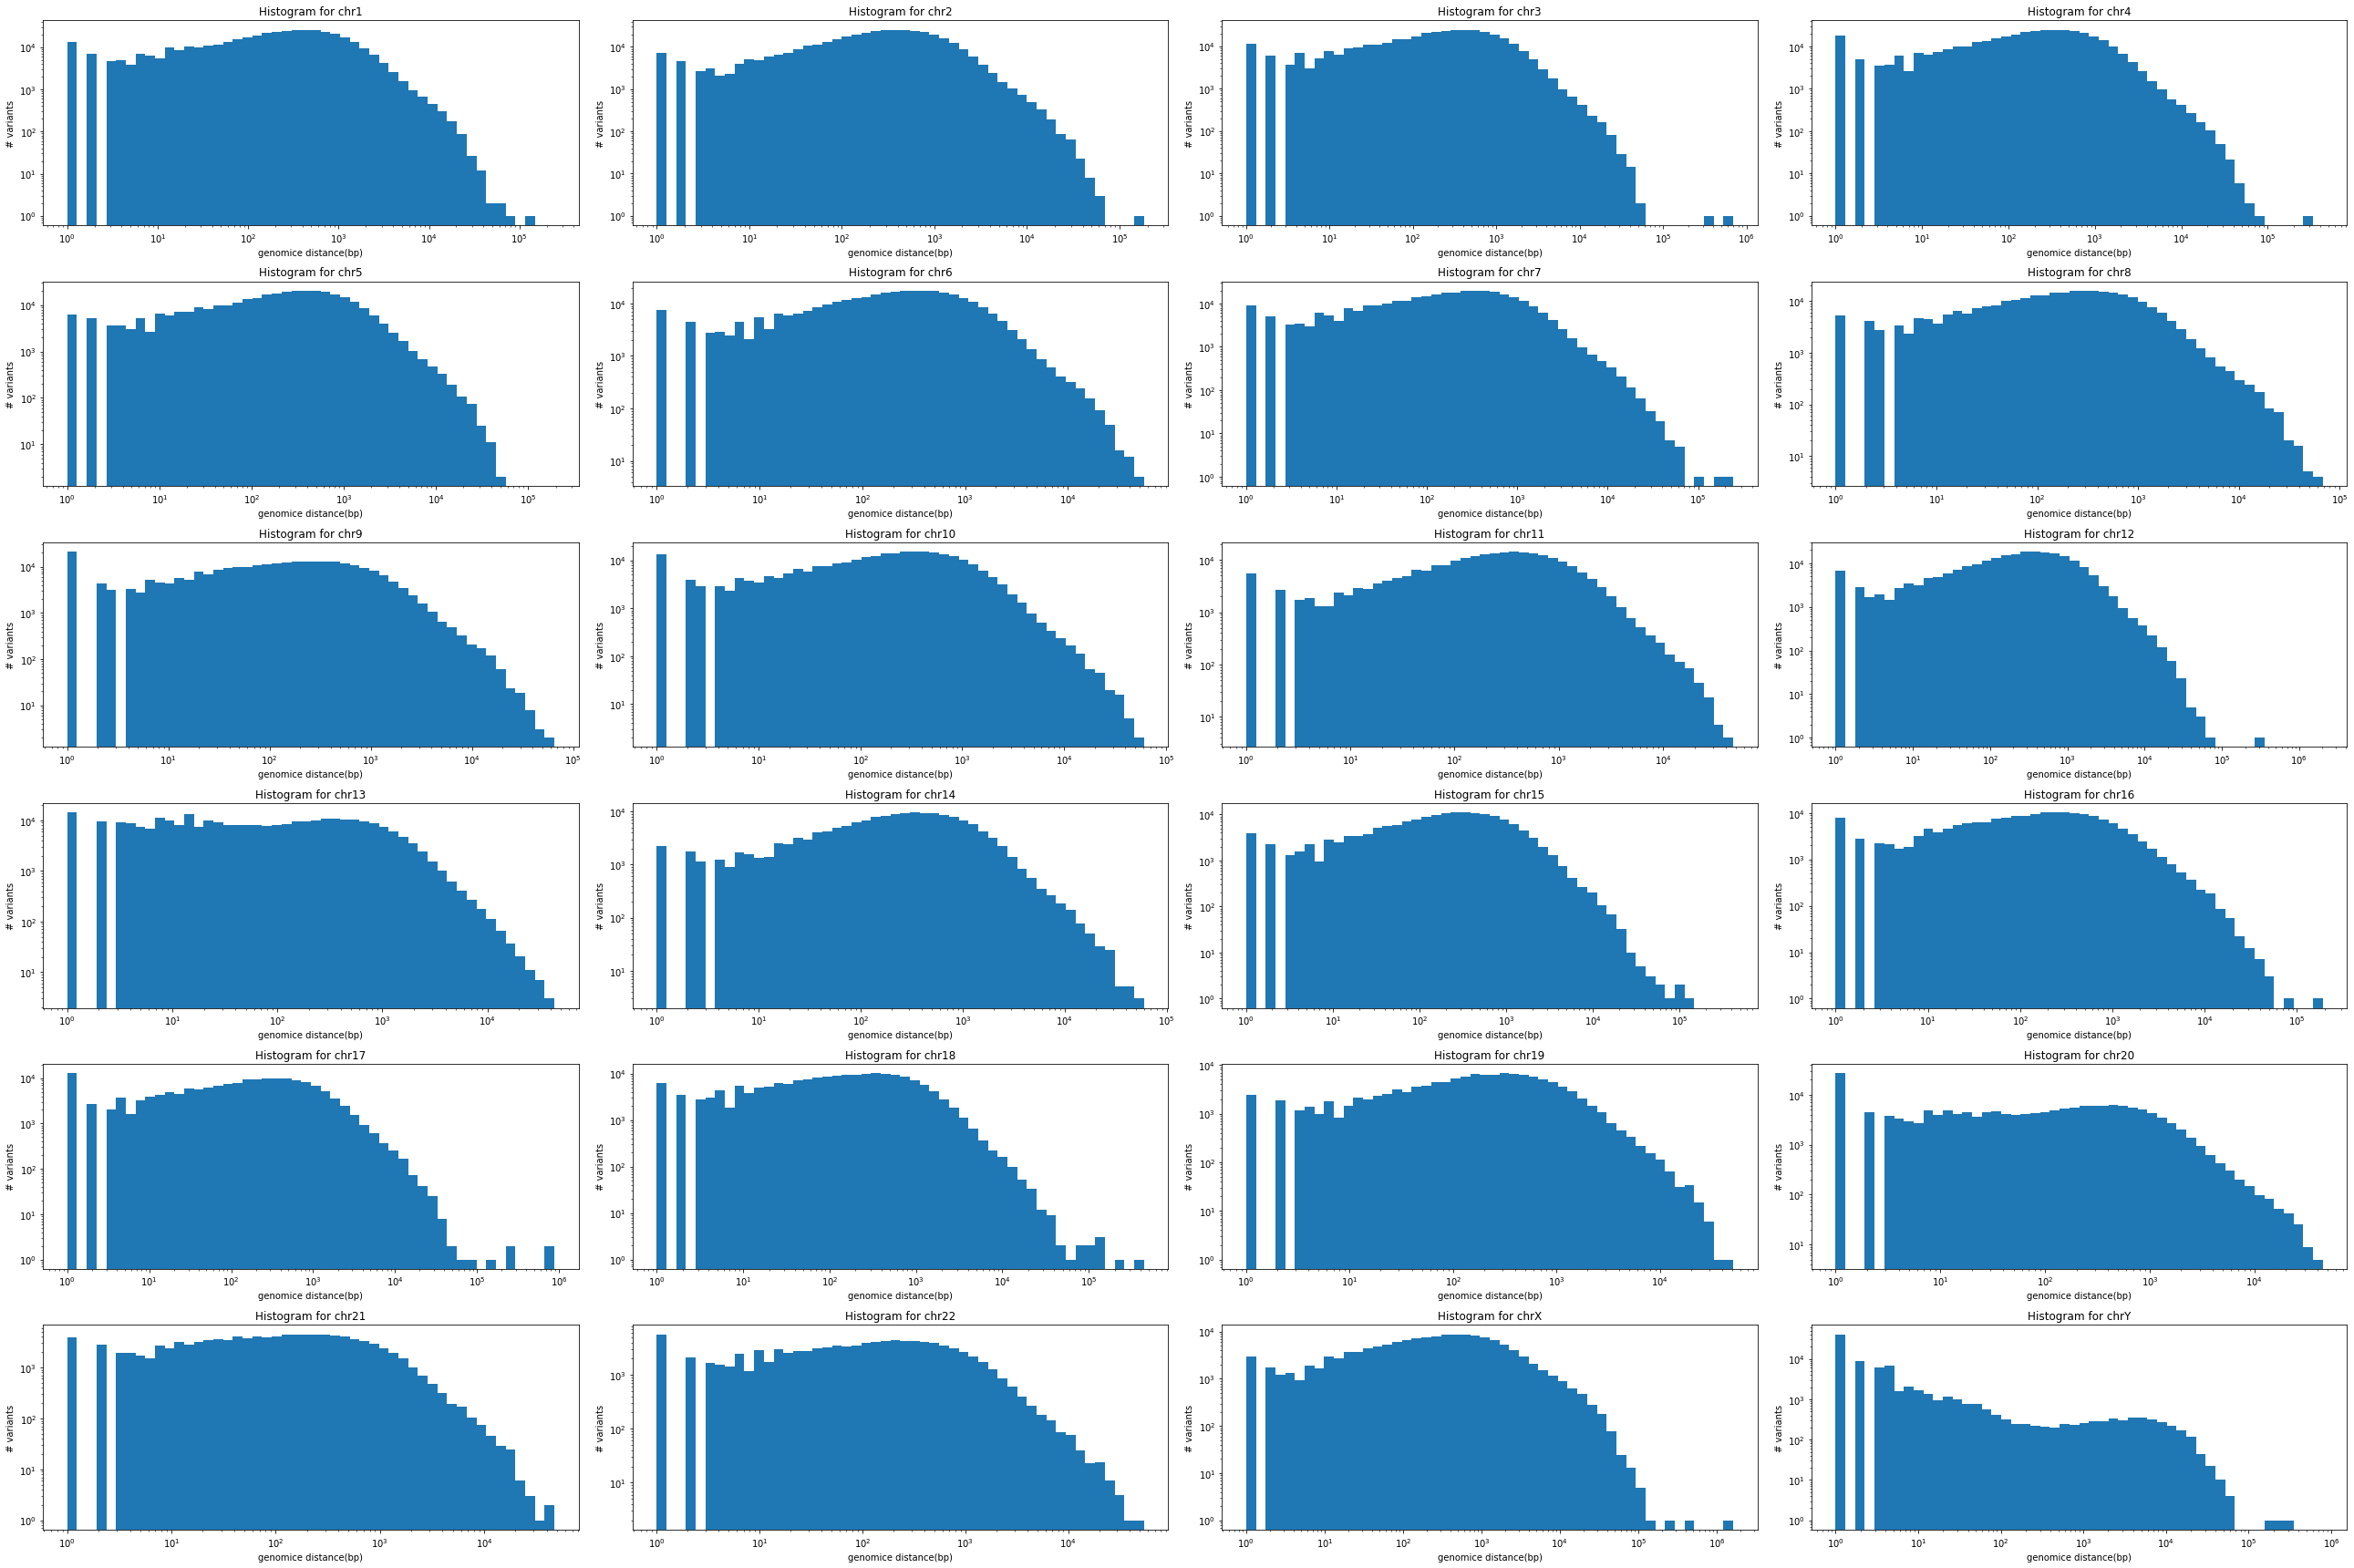

In [29]:

dim1=6
dim2=4

fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(diff_list_allchrom_exclN)):
    
    diff_list = diff_list_allchrom_exclN[chrom_idx]
    plt.subplot(dim1, dim2, chrom_idx+1 )

    hist, bins = np.histogram(diff_list, bins=50)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(diff_list, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Histogram for '+str(chrom_list[chrom_idx]))

    #plt.title('#Histogram of genomic distance between variants')
    plt.xlabel("genomice distance(bp)")
    plt.ylabel("# variants")

# plt.show()
plt.tight_layout() 
plt.savefig(folder+"hist_chrs_variant_distance2b.pdf")

In [6]:
a=diff_list_allchrom[0]

import statistics
statistics.median(a), len(a), sum([1 for i in a if i<100]), sum([1 for i in a if i==1])


(211, 424477, 151165, 13264)

In [7]:
151165/424477

0.3561205907505

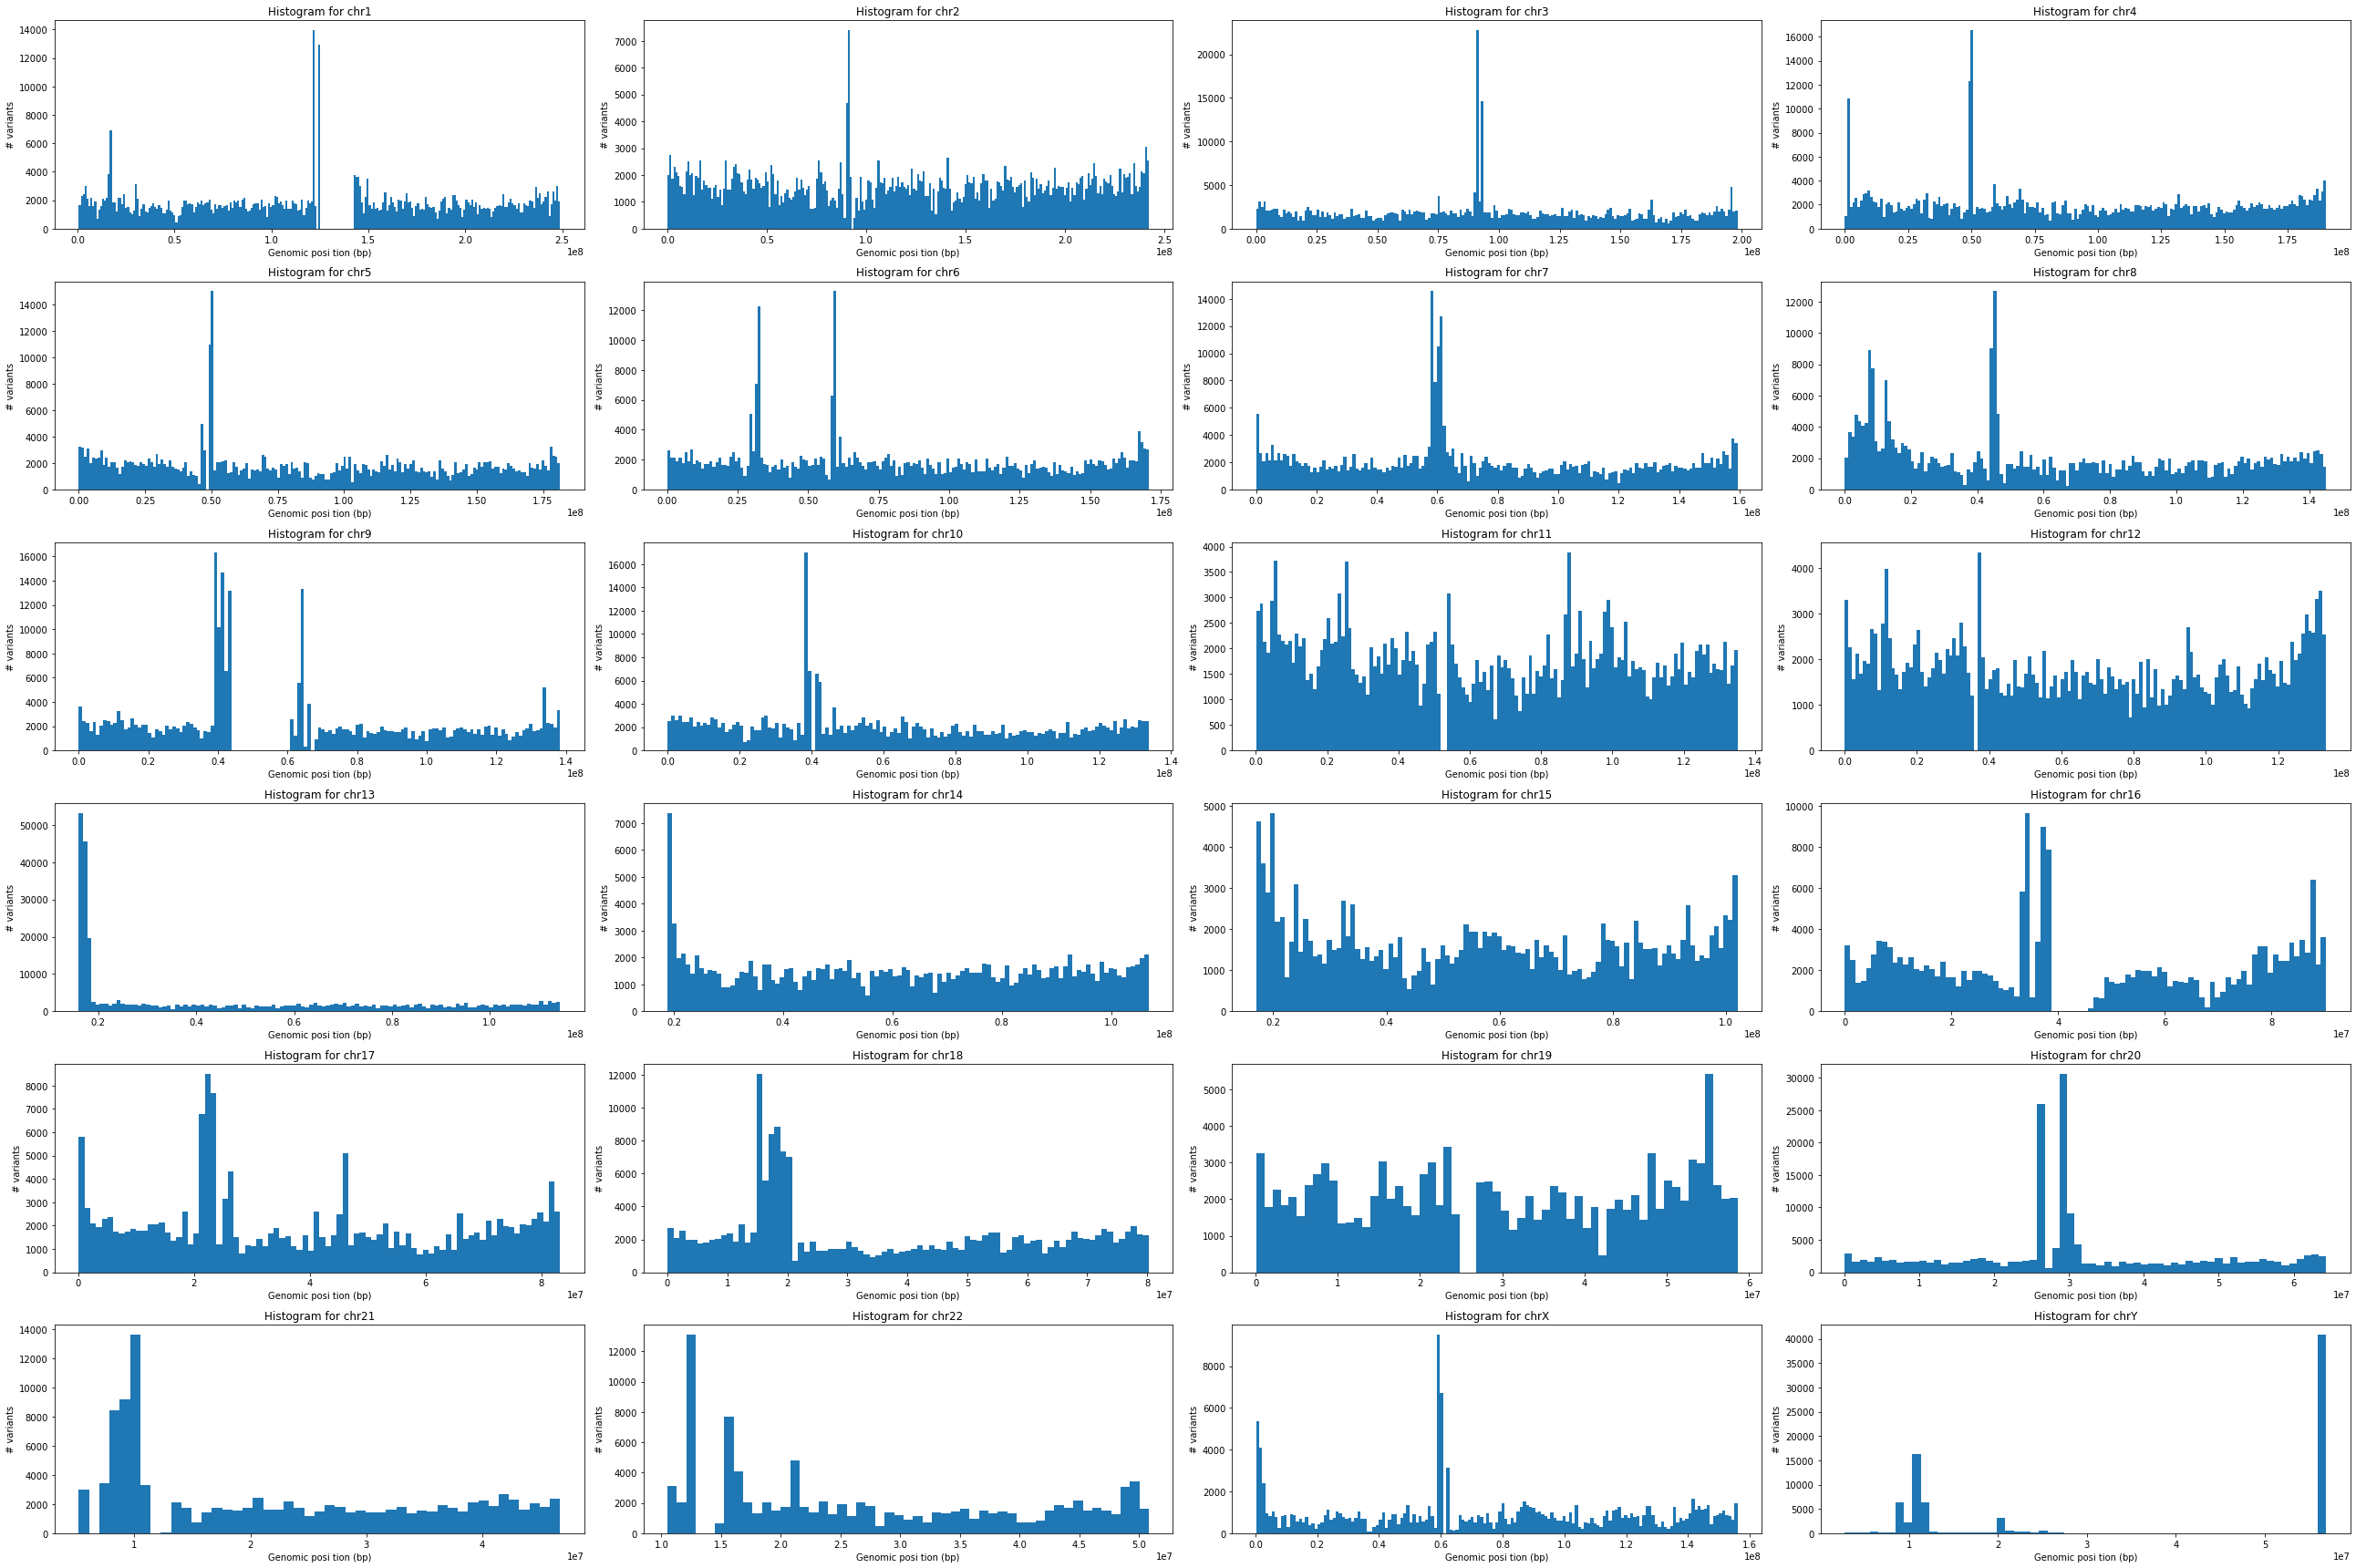

In [206]:
step= 1e6

dim1=6
dim2=4
fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(var_pos_allchrom_list)):
    var_pos_chrom = var_pos_allchrom_list[chrom_idx] 
    num_bucket= int(np.max(var_pos_chrom)/step)+1
    
    plt.subplot(dim1, dim2, chrom_idx+1 )
    plt.hist(var_pos_chrom, bins=num_bucket)
    plt.ylabel("# variants")
    plt.xlabel("Genomic posi tion (bp)")
    plt.title('Histogram for '+str(chrom_list[chrom_idx]))

#plt.show()
plt.tight_layout() 

plt.savefig(folder+"hist_chrs_variant_position2.pdf")

# finding cluster of variants

In [221]:
var_pos_list = var_pos_allchrom_list[22-1]


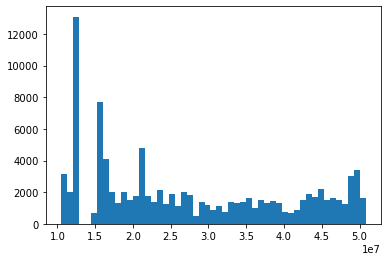

In [222]:
plt.hist(var_pos_list, bins=51)
plt.show()



In [228]:
from sklearn.cluster import MeanShift

import numpy as np 
bandwidth=100000

var_pos_np = np.array(var_pos_list)
var_pos_np_reshaped = var_pos_np.reshape(-1, 1)

clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(var_pos_np_reshaped) 
    


In [229]:
clusters_labels=clustering.labels_
# cluster labels are not in order, the first one may be 1, next 0 next 2!  # array([1, 1, 0, 0, 0, 2, 2])
cluster_unique, cluster_id = np.unique(clusters_labels, return_index=True)
cluster_unique_order_preserved = cluster_unique[np.argsort(cluster_id)]


In [230]:
clusters_labels[:20]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [236]:

# for each cluster, find the boundries (start/end genomic position)
list_boundries_clusters = []
for cluster_id  in cluster_unique_order_preserved:
    indices_this_cluster = np.where(clusters_labels == cluster_id)  # indices of alleles in the combined list which are estimated to be in this cluster
    pos_this_cluster = var_pos_np[indices_this_cluster]
    start_pos_this_cluster = pos_this_cluster[0]
    end_pos_this_cluster = pos_this_cluster[-1]
    list_boundries_clusters.append([start_pos_this_cluster, end_pos_this_cluster])
len(list_boundries_clusters), list_boundries_clusters[:10]



(147,
 [[10510212, 10784614],
  [11215960, 11377746],
  [11547776, 11631069],
  [11780754, 11976156],
  [12027635, 12225568],
  [12275666, 12438435],
  [12489008, 12641590],
  [15154408, 15325997],
  [15326966, 15495264],
  [15495353, 15689199]])

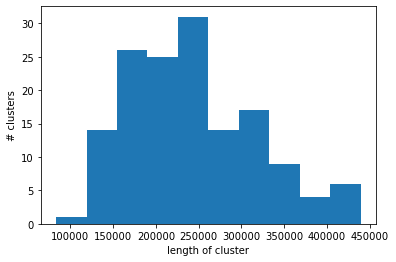

In [246]:
list_boundries_clusters_len =[i[1]-i[0] for i in list_boundries_clusters]
plt.hist(list_boundries_clusters_len)
plt.xlabel("length of cluster")
plt.ylabel("# clusters")
plt.show()

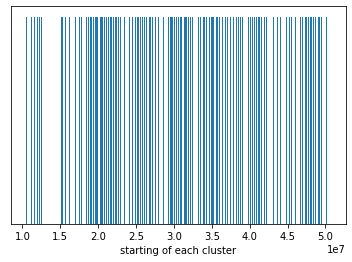

In [250]:
start_pos_clisters = [i[0] for i in list_boundries_clusters]
plt.bar(start_pos_clisters, 1, width=100000)
plt.xlabel("starting of each cluster")
plt.yticks([10])
plt.show()
